# Optimization
#### Programming in Finance and Economics I
Peter Gruber (peter.gruber@usi.ch), Mattia Biancaterra (mattia.biancaterra@usi.ch)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1D Grid Search in Python

Performs a 1D grid search to find the minimum value of the function `f(x) = x^2 - x + 2` over a specified range:

1. **Define the Function**: The function `f(x)` is defined, representing the equation `x^2 - x + 2`.

2. **Create a Range of x Values**: An array `x_vec` is created using `numpy.linspace` to generate a range of `x` values from -10 to 10, with 1000 points in this range.

3. **Compute Corresponding y Values**: The `f(x)` function is evaluated for each value in `x_vec`, resulting in an array `y_vec` containing the computed values.

4. **Plotting the Function (Optional)**: The `matplotlib.pyplot` library is used to plot the function `f(x)` over the specified range of `x` values. This step is optional and is mainly for visualization purposes.

5. **Find the Minimum Value**: `numpy.min` and `numpy.argmin` are used to find the minimum value in `y_vec` and the index of this minimum value, respectively.

6. **Determine the x Value at Minimum**: The `x` value corresponding to the minimum `y` value is obtained by indexing `x_vec` with the index found in the previous step.

The final output includes the minimum value of the function `f(x)` and the corresponding `x` value at which this minimum occurs.


In [41]:
f = lambda x: x**2 - x + 2                   # quick lambda function, see "Introduction to Python"

# Many x values
x_vec = np.linspace(-10, 10, 1000)

# Corresponding y values
y_vec = f(x_vec)

In [42]:
print(x_vec[0:5])
print(y_vec[0:5])

[-10.          -9.97997998  -9.95995996  -9.93993994  -9.91991992]
[112.         111.57998038 111.16076236 110.74234595 110.32473114]


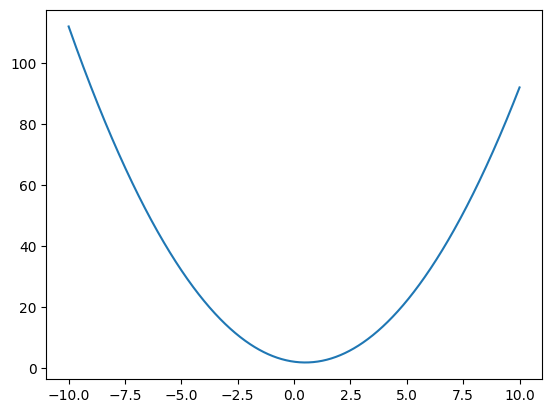

In [43]:
# Plotting for curiosity
plt.plot(x_vec, y_vec)
plt.show()

In [68]:
# Value of minimum
y0 = np.min(y_vec)

# Index of minimum
idx = np.where(y_vec == y0)

# x-value where minimal y occurs
x0 = x_vec[idx]

print(idx)
print(x0)

(array([0]),)
[-5.]


### 2D Grid Search in Python

Performs a 2D grid search to find the minimum value of a function `g(x, y) = x^2 + y^2 - x + 2` over a specified range:

1. **Define the Function**: A function `g(x, y)` is defined to represent the equation.

2. **Create Value Ranges for `x` and `y`**: Arrays `x_vec` and `y_vec` are created using `numpy.linspace` to generate a range of values for `x` and `y` between -5 and 5, with 101 points in each range.

3. **Generate a Meshgrid**: The `numpy.meshgrid` function is used to create a 2D grid (`x_mesh`, `y_mesh`) by combining `x_vec` and `y_vec`. This meshgrid represents all combinations of `x` and `y` values in the specified range.

4. **Evaluate the Function on the Grid**: The function `g(x, y)` is evaluated at each point on the meshgrid, resulting in a matrix `z` containing the function values.

5. **Find the Minimum Value**: `numpy.argmin` is used to find the index of the minimum value in the `z` matrix. `numpy.unravel_index` then converts this index to the corresponding indices in the `x_mesh` and `y_mesh` arrays.

6. **Extract Coordinates of the Minimum**: The `x` and `y` coordinates corresponding to the minimum value are extracted from the `x_mesh` and `y_mesh` arrays using the indices obtained in the previous step.

The final output is the `x` and `y` coordinates of the point where the function `g(x, y)` attains its minimum value within the specified range.


In [64]:
g = lambda x,y: x**2 + y**2 - x + 2

# Create x-values and y-values
x_vec = np.linspace(-5, 5, 101)
y_vec = np.linspace(-5, 5, 101)

# Create mesh
x_mesh, y_mesh = np.meshgrid(x_vec, y_vec)

# Evaluate g() at mesh
z = g(x_mesh, y_mesh)

print(x_mesh)
print()
print(y_mesh)

[[-5.  -4.9 -4.8 ...  4.8  4.9  5. ]
 [-5.  -4.9 -4.8 ...  4.8  4.9  5. ]
 [-5.  -4.9 -4.8 ...  4.8  4.9  5. ]
 ...
 [-5.  -4.9 -4.8 ...  4.8  4.9  5. ]
 [-5.  -4.9 -4.8 ...  4.8  4.9  5. ]
 [-5.  -4.9 -4.8 ...  4.8  4.9  5. ]]

[[-5.  -5.  -5.  ... -5.  -5.  -5. ]
 [-4.9 -4.9 -4.9 ... -4.9 -4.9 -4.9]
 [-4.8 -4.8 -4.8 ... -4.8 -4.8 -4.8]
 ...
 [ 4.8  4.8  4.8 ...  4.8  4.8  4.8]
 [ 4.9  4.9  4.9 ...  4.9  4.9  4.9]
 [ 5.   5.   5.  ...  5.   5.   5. ]]


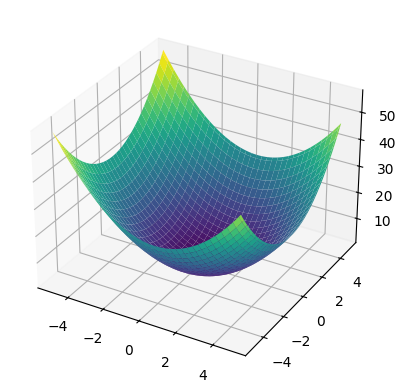

In [65]:
# plot for curiosity
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(x_mesh, y_mesh, z, cmap='viridis')
plt.show()

In [67]:
# Value of minimum
z0 = np.min(z)

# Index of minimum
x0_idx, y0_idx = np.where(z ==z0)

print(x0_idx, y0_idx)

[50] [55]


In [63]:
# Solution
x0 = x_vec[x0_idx]
y0 = y_vec[y0_idx]

print(x0, y0)

[0.] [0.5]


### Nelder-Mead Optimization in Python

Nelder-Mead optimization method to minimize a given objective function. The code is designed to highlight how this optimization technique can be influenced by local minima. The procedure involves the following steps:

1. **Define the Objective Function**: The function `objective(x)` is defined as `(x - 3) ** 2 + 10 * np.sin(x)`. This function is chosen because it has multiple local minima, which can challenge optimization algorithms.

2. **Set the Bounds for Optimization**: The variable `bounds` is set to [(-10, 10)], defining the range within which the optimization will be conducted.

3. **Optimization Using Nelder-Mead Algorithm**: The `scipy.optimize.minimize` function is used with the Nelder-Mead method. The initial guess (`x0`) is set to [0], and the bounds are applied. The Nelder-Mead algorithm does not inherently support bounds, but they are included here for completeness.

4. **Plotting the Objective Function and Optimization Path**: 
   - The `matplotlib.pyplot` library is used to plot the objective function over the range of `x` from -10 to 10.
   - The result of the optimization (`result.x` and `result.fun`) is plotted as a red dot on this graph.
   - Labels, legend, and title are added for clarity and visual understanding.

5. **Visualization and Interpretation**:
   - The plot shows the objective function and the point where the Nelder-Mead algorithm concluded its optimization.
   - This visualization is crucial to understand how the Nelder-Mead algorithm, known for its simplicity and effectiveness in many scenarios, can potentially get trapped in local minima, especially in functions with multiple such minima.


In [98]:
from scipy.optimize import minimize

# Define the function to be optimized
f = lambda x: (x - 3) ** 2 + 10 * np.sin(x)

# Define the bounds for the optimization
bounds = [(-10, 10)]

# Run the optimization using Nelder-Mead algorithm
x_start = -7
result = minimize(f, x0=x_start, method='Nelder-Mead', bounds=bounds)

# Here is the result
result

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -7.559257717452774
             x: [ 4.424e+00]
           nit: 21
          nfev: 42
 final_simplex: (array([[ 4.424e+00],
                       [ 4.424e+00]]), array([-7.559e+00, -7.559e+00]))

In [104]:
# Result is np.array
result.x

array([4.42362061])

In [114]:
# Run several experiments
x_start_0 = -7
result = minimize(f, x0=x_start_0, method='Nelder-Mead', bounds=bounds)
x_0 = result.x.tolist()[0]                     # convert array to scalar

x_start_1= -5
result = minimize(f, x0=x_start_1, method='Nelder-Mead', bounds=bounds)
x_1 = result.x.tolist()[0]                     # convert array to scalar

x_start_2= 1.0
result = minimize(f, x0=x_start_2, method='Nelder-Mead', bounds=bounds)
x_2 = result.x.tolist()[0]                     # convert array to scalar

x_start_3= 7.5
result = minimize(f, x0=x_start_3, method='Nelder-Mead', bounds=bounds)
x_3= result.x.tolist()[0]                     # convert array to scalar

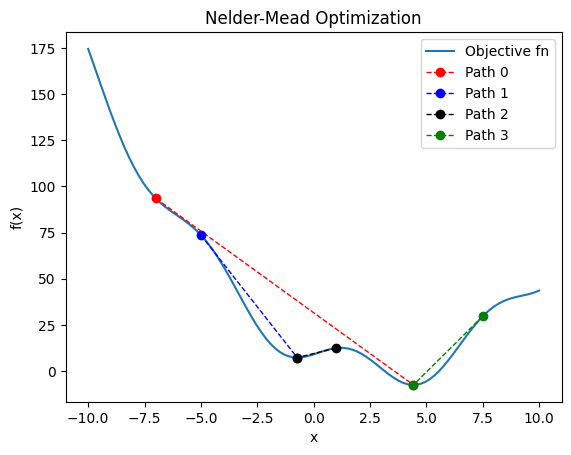

In [119]:
# Plot the optimization path
x = np.linspace(-10, 10, 100)
y = f(x)

plt.plot(x, y, label='Objective fn')
plt.plot([x_start_0, x_0], [f(x_start_0), f(x_0)], 'ro--', lw=1, label='Path 0')
plt.plot([x_start_1, x_1], [f(x_start_1), f(x_1)], 'bo--', lw=1, label='Path 1')
plt.plot([x_start_2, x_2], [f(x_start_2), f(x_2)], 'ko--', lw=1, label='Path 2')
plt.plot([x_start_3, x_3], [f(x_start_3), f(x_3)], 'go--', lw=1, label='Path 3')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Nelder-Mead Optimization')
plt.show()

**Exercisses** 

1. Using grid search and the Nelder-Mead algorithm, find the *minimum* of the function $$f(x) = x^4-2x^2+0.5x+2$$
1. Using grid search and the Nelder-Mead algorithm, find the *maximum* of the function $$f(x) = \frac{1}{x^2-x+1}$$